## Pandas

http://pandas.pydata.org/

Data analysis library that introduces the concepts of data-frames and series to Python. Powerful tool for time-series analysis and fast visualizations of data.

Excellent introduction by the author: https://vimeo.com/59324550


### Software development rigor applied to spread-sheets.

http://www.eusprig.org/horror-stories.htm


See pages 131-132 of the JP Morgan Task Force Report "...further errors were discovered in the Basel II.5 model, including, most significantly, an operational error in the calculation of the relative changes in hazard rates and correlation estimates. Specifically, after subtracting the old rate from the new rate, the spreadsheet divided by their sum instead of their average, as the modeler had intended. This error likely had the effect of muting volatility by a factor of two and of lowering the VaR" 

As reported in "A tempest in a spreadsheet" http://ftalphaville.ft.com/2013/01/17/1342082/a-tempest-in-a-spreadsheet/? Lisa Pollack comments "On a number of occasions, he asked the trader to whom he reported for additional resources to support his work on the VaR model, but he did not receive any. Also it appears that he (had to?) cut a number of corners, which resulted increased operational risk and artificially low volatility numbers ... pressure was put on the reviewers to get on with approving the model"

- - - 

In [3]:
import pandas as pd
import numpy as np

### Dataframes

A flexible data structure for tabular data manipulation.


In [4]:
data = np.random.rand(5, 5)
data

array([[ 0.11136514,  0.34564178,  0.36207501,  0.10928303,  0.23617125],
       [ 0.87418422,  0.77971153,  0.11963717,  0.70805528,  0.30961709],
       [ 0.13309799,  0.39839735,  0.02563285,  0.05845129,  0.7524707 ],
       [ 0.90579327,  0.61830154,  0.11830614,  0.08292107,  0.52969787],
       [ 0.21768693,  0.92985965,  0.331046  ,  0.17220181,  0.30970313]])

Matrix representation of data, provided by numpy, often isn't enough and this is where Pandas can help, through the introduction of a "data-frame", which is a tabular representation.

In [5]:
pd.DataFrame(data)

,0,1,2,3,4
0,0.111365,0.345642,0.362075,0.109283,0.236171
1,0.874184,0.779712,0.119637,0.708055,0.309617
2,0.133098,0.398397,0.025633,0.058451,0.752471
3,0.905793,0.618302,0.118306,0.082921,0.529698
4,0.217687,0.929860,0.331046,0.172202,0.309703


In [6]:
table = pd.DataFrame(data, columns=["a","b","c","d","e"])
table

,a,b,c,d,e
0,0.111365,0.345642,0.362075,0.109283,0.236171
1,0.874184,0.779712,0.119637,0.708055,0.309617
2,0.133098,0.398397,0.025633,0.058451,0.752471
3,0.905793,0.618302,0.118306,0.082921,0.529698
4,0.217687,0.929860,0.331046,0.172202,0.309703


Note the automatic selection of an index (left hand column). This can be used to pull out rows of interest.

In [7]:
table.ix[0]

a    0.111365
b    0.345642
c    0.362075
d    0.109283
e    0.236171
Name: 0, dtype: float64

Similarly we can select data from columns.

In [8]:
table["a"]

0    0.111365
1    0.874184
2    0.133098
3    0.905793
4    0.217687
Name: a, dtype: float64

In [9]:
table[["a","e"]]

,a,e
0,0.111365,0.236171
1,0.874184,0.309617
2,0.133098,0.752471
3,0.905793,0.529698
4,0.217687,0.309703


A table behave similarly to a numpy array (in fact underneath it is a nd-array), meaning we can use fancy indexing:

In [10]:
missing_data = table[table > 0.6]
missing_data

,a,b,c,d,e
0,NaN,NaN,NaN,NaN,NaN
1,0.874184,0.779712,NaN,0.708055,NaN
2,NaN,NaN,NaN,NaN,0.752471
3,0.905793,0.618302,NaN,NaN,NaN
4,NaN,0.929860,NaN,NaN,NaN


Q. What are the summary statistics of the "missing_data" table?

In [11]:
missing_data.describe()

,a,b,c,d,e
count,2.000000,3.000000,0,1.000000,1.000000
mean,0.889989,0.775958,NaN,0.708055,0.752471
std,0.022351,0.155813,NaN,NaN,NaN
min,0.874184,0.618302,NaN,0.708055,0.752471
25%,0.882086,0.699007,NaN,0.708055,0.752471
50%,0.889989,0.779712,NaN,0.708055,0.752471
75%,0.897891,0.854786,NaN,0.708055,0.752471
max,0.905793,0.929860,NaN,0.708055,0.752471


In [12]:
missing_data.count()

a    2
b    3
c    0
d    1
e    1
dtype: int64

In [13]:
missing_data.min()

a    0.874184
b    0.618302
c         NaN
d    0.708055
e    0.752471
dtype: float64

Visualization of data is made simple with pandas (for simple things).

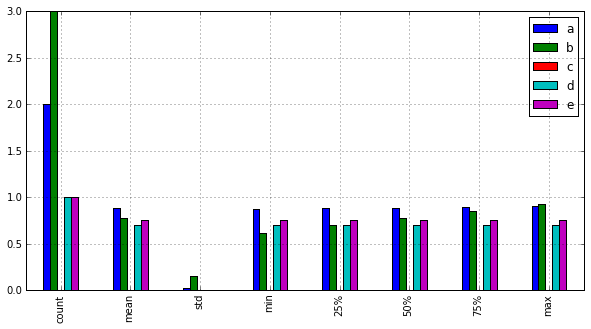

In [14]:
%matplotlib inline

missing_data.describe().plot(kind='bar', figsize=(10,5))

### Time series

Pandas has an extensive set of functions for working with time series.

http://pandas.pydata.org/pandas-docs/dev/timeseries.html#time-series-date-functionality

Creating a time series of data requires a time based index.

In [15]:
dates = pd.date_range(start="1/1/14", end="31/12/14")
dates

<class 'pandas.tseries.index.DatetimeIndex'>
[2014-01-01, ..., 2014-12-31]
Length: 365, Freq: D, Timezone: None

In [16]:
values = np.sin(np.linspace(0,2*np.pi,365)) * np.random.rand(365)
values[:10]

array([ 0.        ,  0.01208059,  0.00870792,  0.0033798 ,  0.02478054,
        0.07720741,  0.09479456,  0.06792449,  0.11752456,  0.01210146])

In [17]:
time_series = pd.Series(index=dates, data=values)
time_series.head()

2014-01-01    0.000000
2014-01-02    0.012081
2014-01-03    0.008708
2014-01-04    0.003380
2014-01-05    0.024781
Freq: D, dtype: float64

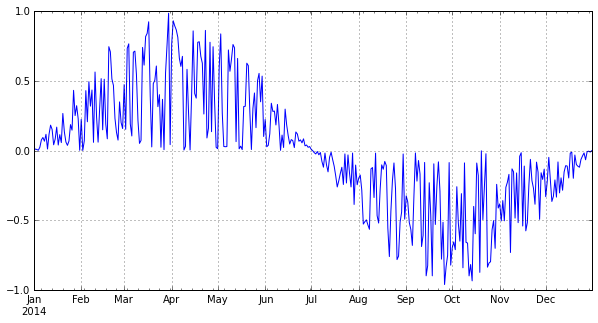

In [18]:
time_series.plot(figsize=(10,5))

Q. Whats the monthly variation of the time-series. Smooth out the noise by down-sampling - **note any change in the signal**.

http://pandas.pydata.org/pandas-docs/dev/timeseries.html#up-and-downsampling

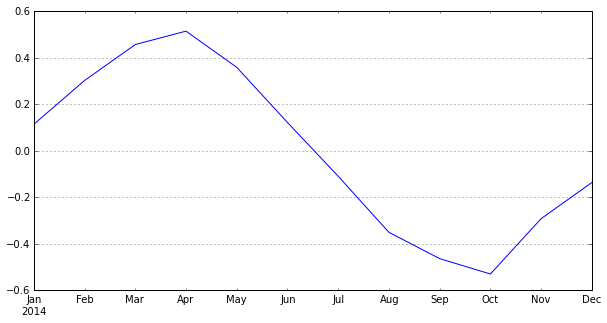

In [19]:
time_series.resample("M").plot(figsize=(10,5))

### Split - Apply - Combine

A powerful concept that will help you to perform complex operations on datasets.

http://pandas.pydata.org/pandas-docs/stable/groupby.html

In [20]:
dates = pd.date_range(start="1/1/14", end="31/12/14")

categories = ["a", "b", "c", "d"]
noisey_signal = np.c_[np.sin(np.linspace(0, 2*np.pi, 365)) * np.random.rand(365)]
data = np.hstack([0.5 * noisey_signal, 3.5 * noisey_signal, 0.01 * noisey_signal, noisey_signal])
table = pd.DataFrame(data=data, columns=categories)

table["date"] = dates
table["month"] = [x.strftime("%B") for x in dates]

table.head()

,a,b,c,d,date,month
0,0.000000,0.000000,0.000000,0.000000,2014-01-01,January
1,0.002959,0.020713,0.000059,0.005918,2014-01-02,January
2,0.015538,0.108765,0.000311,0.031076,2014-01-03,January
3,0.024433,0.171029,0.000489,0.048865,2014-01-04,January
4,0.032259,0.225815,0.000645,0.064519,2014-01-05,January


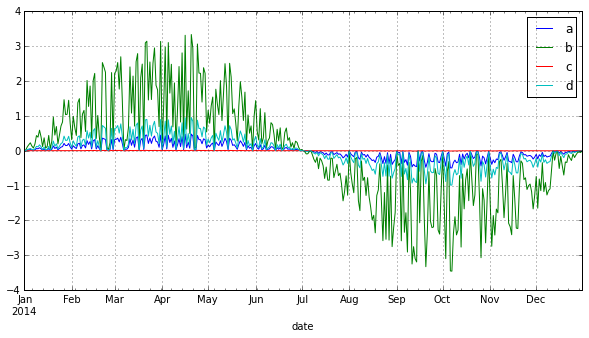

In [21]:
table.set_index("date")[["a","b","c","d"]].plot(figsize=(10,5))

Q. What are the summary statistics for December?

In [22]:
table[table["month"] == "December"].describe()

,a,b,c,d
count,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01
mean,-6.830782e-02,-4.781548e-01,-1.366156e-03,-1.366156e-01
std,6.565410e-02,4.595787e-01,1.313082e-03,1.313082e-01
min,-2.355060e-01,-1.648542e+00,-4.710119e-03,-4.710119e-01
25%,-1.107288e-01,-7.751017e-01,-2.214576e-03,-2.214576e-01
50%,-4.631641e-02,-3.242149e-01,-9.263283e-04,-9.263283e-02
75%,-1.454051e-02,-1.017836e-01,-2.908102e-04,-2.908102e-02
max,-8.235861e-17,-5.765103e-16,-1.647172e-18,-1.647172e-16


In [23]:
groups = table.groupby("month").describe().loc["December"]

Q. What are the summary statistics for all months starting with the letter "J".

In [24]:
groups = table.groupby( [x[0] for x in table["month"]] ).describe().loc["J"]
groups

,a,b,c,d
count,92.000000,92.000000,92.000000,92.000000
mean,0.018817,0.131722,0.000376,0.037635
std,0.082710,0.578973,0.001654,0.165421
min,-0.205431,-1.438015,-0.004109,-0.410862
25%,-0.019058,-0.133406,-0.000381,-0.038116
50%,0.017047,0.119329,0.000341,0.034094
75%,0.062725,0.439072,0.001254,0.125449
max,0.208965,1.462756,0.004179,0.417930


Q. What is the 95 quantile for each month.

In [25]:
table.groupby("month").quantile(.95)

,a,b,c,d
month,,,,
April,0.459385,3.215695,0.009188,0.918770
August,-0.030179,-0.211250,-0.000604,-0.060357
December,-0.003672,-0.025707,-0.000073,-0.007345
February,0.335090,2.345630,0.006702,0.670180
January,0.177819,1.244735,0.003556,0.355638
July,-0.000293,-0.002053,-0.000006,-0.000586
June,0.164869,1.154082,0.003297,0.329738
March,0.444446,3.111123,0.008889,0.888892
May,0.329228,2.304595,0.006585,0.658456


Q. Plot the monthly statistics for the "a" category.

In [26]:
data = table[["date", "a"]].set_index("date")
data.head()

,a
date,
2014-01-01,0.000000
2014-01-02,0.002959
2014-01-03,0.015538
2014-01-04,0.024433
2014-01-05,0.032259


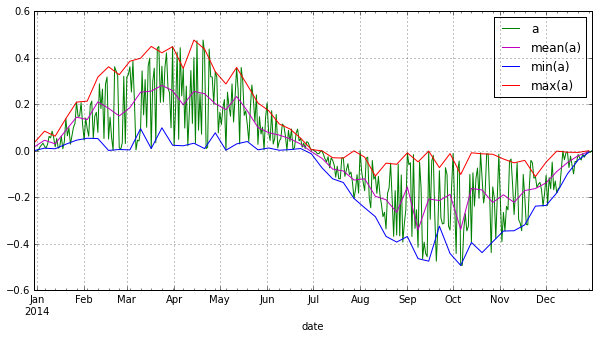

In [27]:
ax = data.plot(figsize=(10,5), color='g')
data.resample('w').plot(color='m', ax=ax)
data.resample('w', how="min").plot(color='b', ax=ax)
data.resample('w', how="max").plot(color='r', ax=ax)
ax.legend(['a', 'mean(a)', 'min(a)', 'max(a)']);

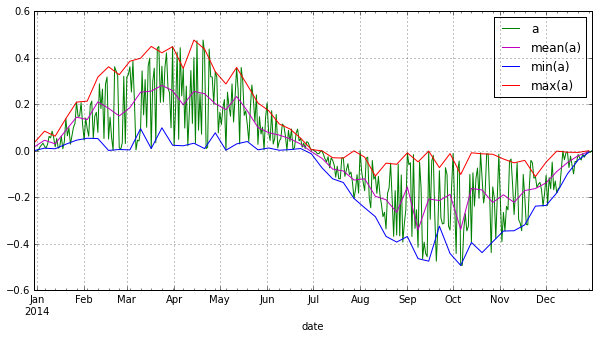

In [28]:
ax = data.plot(figsize=(10,5), color='g')
data.resample("w", how=["mean", "min", "max"]).plot(ax=ax, color=["m","b","r"])
ax.legend(['a', 'mean(a)', 'min(a)', 'max(a)']);

# IO

Walk through an example of loading an excel sheet.

http://pandas.pydata.org/pandas-docs/stable/io.html